<a href="https://colab.research.google.com/github/NingJingwen/Computer-Vision/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classifier with custom model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, warnings
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory 

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'drive/MyDrive/car-truck-bumper/train',
    labels='inferred',
    label_mode='int',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
 )
ds_valid_ = image_dataset_from_directory(
    'drive/MyDrive/car-truck-bumper/valid',
    labels='inferred',
    label_mode='int',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 2534 files belonging to 3 classes.
Found 1826 files belonging to 2 classes.


In [ ]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [ ]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing

# new-made model
def create_model():
    model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=3, activation="softmax"),
    ])
    return (model)

def compile_model(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
        loss = 'sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy'],)
    return(model)
  

In [ ]:
# import os

# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR']) 
#     print('Running on TPU ', tpu.master())
# except ValueError:
#     tpu = None

# if tpu:
#     tf.config.experimental_connect_to_cluster(tpu)
#     tf.tpu.experimental.initialize_tpu_system(tpu)
#     strategy = tf.distribute.experimental.TPUStrategy(tpu)
# else:
#     strategy = tf.distribute.get_strategy() 

# with strategy.scope():
#     model = create_model()
#     model = compile_model(model)
model=create_model()
model=compile_model(model)

In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=15,
)

Epoch 1/15
40/40 [==============================] - 1287s 28s/step - loss: 1.0978 - sparse_categorical_accuracy: 0.4346 - val_loss: 1.0652 - val_sparse_categorical_accuracy: 0.8932
Epoch 2/15
40/40 [==============================] - 148s 4s/step - loss: 1.0666 - sparse_categorical_accuracy: 0.6085 - val_loss: 0.9789 - val_sparse_categorical_accuracy: 0.8850
Epoch 3/15
40/40 [==============================] - 148s 4s/step - loss: 0.9981 - sparse_categorical_accuracy: 0.6413 - val_loss: 0.9239 - val_sparse_categorical_accuracy: 0.8954
Epoch 4/15
40/40 [==============================] - 148s 4s/step - loss: 0.9173 - sparse_categorical_accuracy: 0.7099 - val_loss: 0.9211 - val_sparse_categorical_accuracy: 0.8039
Epoch 5/15
40/40 [==============================] - 147s 4s/step - loss: 0.8861 - sparse_categorical_accuracy: 0.7336 - val_loss: 0.8170 - val_sparse_categorical_accuracy: 0.9184
Epoch 6/15
40/40 [==============================] - 148s 4s/step - loss: 0.8578 - sparse_categorical_ac

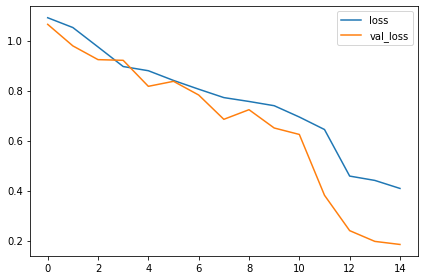

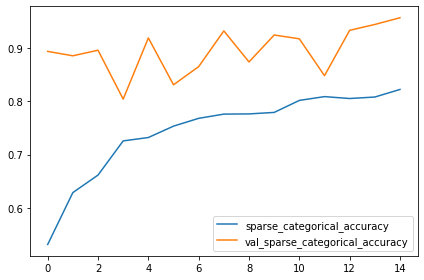

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot();